# Zadanie 1

Posługując się danymi z pliku infmort stwórz modele objaśniające czy dany kraj eksportuje rope. 
Wytrenuj klasyfikacyjne sieci neuronowez jedną ukrytą warstwą zawierającą odpowiednio różne ilości ukrytych węzłów.
Wypisz 'confusion matrix' współczynnik f1, procent udanej predykcji. Stwórz krzywą błędu uczącego oraz walidacyjnego w zależności od ilości użytych warstw. Który model jest najskuteczniejszy? Porównaj go z regresją logistyczną.

In [20]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report as CR, confusion_matrix as CM

df = pd.read_csv('infmort.csv')
data = pd.get_dummies(df[['region', 'income', 'mortality']])

#print(data.isnull().any())
        
avg_mort = np.mean(data['mortality'].dropna().to_numpy())
data['mortality'] = data['mortality'].fillna(avg_mort)
#print()
#print(data.isnull().any())

X = data.to_numpy()
y = list(df['oil'].to_numpy())

for i in range(len(y)):
    if y[i]=='oil exports':
        y[i]=1
    else:
        y[i]=0

#2 wezly ukryte-----------------------------------------------
mlp2 = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=5000)
mlp2.fit(X,y)
y_pred2 = mlp2.predict(X)
print('2 ukryte wezly: ')
print(CR(y,y_pred2))
print(CM(y,y_pred2))

#6 wezlow ukrytych--------------------------------------------
mlp6 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', max_iter=5000)
mlp6.fit(X,y)
y_pred = mlp6.predict(X)
print('6 ukrytych wezlow: ')
print(CR(y,y_pred))
print(CM(y,y_pred))

#10 wezlow ukrytych-------------------------------------------
mlp10 = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=5000)
mlp10.fit(X,y)
y_pred = mlp10.predict(X)
print('10 ukrytych wezlow: ')
print(CR(y,y_pred))
print(CM(y,y_pred))

#20 wezlow ukrytych-------------------------------------------
mlp20 = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', max_iter=5000)
mlp20.fit(X,y)
y_pred = mlp20.predict(X)
print('20 ukrytych wezlow: ')
print(CR(y,y_pred))
print(CM(y,y_pred))



2 ukryte wezly: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       0.00      0.00      0.00         9

    accuracy                           0.91       105
   macro avg       0.46      0.50      0.48       105
weighted avg       0.84      0.91      0.87       105

[[96  0]
 [ 9  0]]


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6 ukrytych wezlow: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       0.00      0.00      0.00         9

    accuracy                           0.91       105
   macro avg       0.46      0.50      0.48       105
weighted avg       0.84      0.91      0.87       105

[[96  0]
 [ 9  0]]


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 ukrytych wezlow: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       0.00      0.00      0.00         9

    accuracy                           0.91       105
   macro avg       0.46      0.50      0.48       105
weighted avg       0.84      0.91      0.87       105

[[96  0]
 [ 9  0]]


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20 ukrytych wezlow: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       0.00      0.00      0.00         9

    accuracy                           0.91       105
   macro avg       0.46      0.50      0.48       105
weighted avg       0.84      0.91      0.87       105

[[96  0]
 [ 9  0]]


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


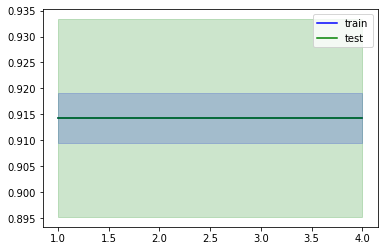

In [21]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

params = [(8,),(8,8),(8,8,8),(8,8,8,8)]
train_scores, test_scores = validation_curve(estimator=mlp, X=X,
                                             y=y, param_name='hidden_layer_sizes',
                                             param_range=params, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot([1,2,3,4], train_mean, 'b', label='train')
plt.plot([1,2,3,4], test_mean, 'g', label='test')
plt.fill_between([1,2,3,4], train_mean-train_std, train_mean+train_std,color='blue', alpha=0.2)
plt.fill_between([1,2,3,4], test_mean-test_std, test_mean+test_std, color='green', alpha=0.2)
plt.legend()
plt.show()

In [104]:
from sklearn.linear_model import LogisticRegression as LR

logreg = LR(penalty='none').fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Regresja logistyczna:')
print(CR(y_test,y_pred))
print(CM(y_test,y_pred))

y_pred = mlp.predict(X_test)
print('Sieć z 6 warstwami:')
print(CR(y_test,y_pred))
print(CM(y_test,y_pred))

Regresja logistyczna:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.33      0.25      0.29         4

    accuracy                           0.84        32
   macro avg       0.61      0.59      0.60        32
weighted avg       0.83      0.84      0.83        32

[[26  2]
 [ 3  1]]
Sieć z 6 warstwami:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       0.00      0.00      0.00         4

    accuracy                           0.88        32
   macro avg       0.44      0.50      0.47        32
weighted avg       0.77      0.88      0.82        32

[[28  0]
 [ 4  0]]


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Zadanie 2

Posługując się danymi z pliku chredlin stwórz modele objaśniające w której części Chicago znajduje się dany dom. 
Wytrenuj klasyfikacyjne sieci neuronowe z jedną ukrytą warstwą zawierającą odpowiednio różne ilości ukrytych węzłów.
Wypisz 'confusion matrix' współczynnik f1, procent udanej predykcji.  Stwórz krzywą błędu uczącego oraz walidacyjnego w zależności od ilości użytych warstw. Który model jest najskuteczniejszy? Porównaj go z regresją logistyczną.

In [15]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report as CR, confusion_matrix as CM

df = pd.read_csv('chredlin.csv')
print(df.columns)

data = df[['race', 'fire', 'theft', 'age', 'involact', 'income']]
X = data.to_numpy()
y = list(df['side'].to_numpy())

for i in range(len(y)):
    if y[i]=='n':
        y[i]=1
    else:
        y[i]=0

#2 wezly ukryte-----------------------------------------------
mlp2 = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=5000)
mlp2.fit(X,y)
y_pred2 = mlp2.predict(X)
print('2 ukryte wezly: ')
print(CR(y,y_pred2))
print(CM(y,y_pred2))
print(mlp2.score(X,y))

#6 wezlow ukrytych--------------------------------------------
mlp6 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', max_iter=5000)
mlp6.fit(X,y)
y_pred = mlp6.predict(X)
print('6 ukrytych wezlow: ')
print(CR(y,y_pred))
print(CM(y,y_pred))
print(mlp6.score(X,y))

#10 wezlow ukrytych-------------------------------------------
mlp10 = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=5000)
mlp10.fit(X,y)
y_pred = mlp10.predict(X)
print('10 ukrytych wezlow: ')
print(CR(y,y_pred))
print(CM(y,y_pred))
print(mlp10.score(X,y))

#20 wezlow ukrytych-------------------------------------------
mlp20 = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', max_iter=5000)
mlp20.fit(X,y)
y_pred = mlp20.predict(X)
print('20 ukrytych wezlow: ')
print(CR(y,y_pred))
print(CM(y,y_pred))
print(mlp20.score(X,y))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

for i in range(30):
    mlp = MLPClassifier(hidden_layer_sizes=(i+1,), activation='logistic', max_iter=5000)
    mlp.fit(X_train,y_train)
    print(i, mlp.score(X_test,y_test))

Index(['Unnamed: 0', 'race', 'fire', 'theft', 'age', 'involact', 'income',
       'side'],
      dtype='object')
2 ukryte wezly: 
              precision    recall  f1-score   support

           0       0.54      0.32      0.40        22
           1       0.56      0.76      0.64        25

    accuracy                           0.55        47
   macro avg       0.55      0.54      0.52        47
weighted avg       0.55      0.55      0.53        47

[[ 7 15]
 [ 6 19]]
0.5531914893617021
6 ukrytych wezlow: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.51      0.92      0.66        25

    accuracy                           0.49        47
   macro avg       0.26      0.46      0.33        47
weighted avg       0.27      0.49      0.35        47

[[ 0 22]
 [ 2 23]]
0.48936170212765956
10 ukrytych wezlow: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87

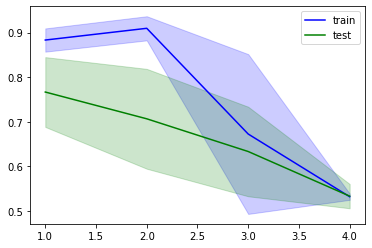

In [19]:
from sklearn.model_selection import train_test_split, validation_curve
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# error_train=[]
# error_test=[]

# l = 10
# all_layers = [l,l,l,l,l,l,l,l]
# for i in range(len(all_layers)):
#     layers = tuple(all_layers[:i+1])
    
#     mlp = MLPClassifier(hidden_layer_sizes=layers,activation='logistic',max_iter=5000)
#     mlp.fit(X_train,y_train)
    
#     error_train.append(1-mlp.score(X_train,y_train))
#     error_test.append(1-mlp.score(X_test,y_test))
    
# plt.plot(error_train)
# plt.plot(error_test)
# plt.show()

# y_pred = mlp.predict(X_train)
# print(CR(y_train,y_pred))
# print(CM(y_train,y_pred))

params = [(8,),(8,8),(8,8,8),(8,8,8,8)]
train_scores, test_scores = validation_curve(estimator=mlp, X=X,
                                             y=y, param_name='hidden_layer_sizes',
                                             param_range=params, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot([1,2,3,4], train_mean, 'b', label='train')
plt.plot([1,2,3,4], test_mean, 'g', label='test')
plt.fill_between([1,2,3,4], train_mean-train_std, train_mean+train_std,color='blue', alpha=0.2)
plt.fill_between([1,2,3,4], test_mean-test_std, test_mean+test_std, color='green', alpha=0.2)
plt.legend()
plt.show()

In [141]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as AS

logreg = LR(penalty='none').fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Regresja logistyczna:')
print(CR(y_test,y_pred))
print(CM(y_test,y_pred))

mlp = MLPClassifier(hidden_layer_sizes=(4,),activation='logistic',max_iter=5000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print('Sieć z 1 warstwami:')
print(CR(y_test,y_pred))
print(CM(y_test,y_pred))


Regresja logistyczna:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10

[[4 2]
 [1 3]]
Sieć z 1 warstwami:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10

[[4 2]
 [1 3]]


# Zadanie 3

Posługując się danymi z pliku wbca stwórz modele objaśniające czy dana pacjentka choruje na złośliwego raka piersi.
Wytrenuj klasyfikacyjne sieci neuronowez jedną ukrytą warstwą zawierającą odpowiednio różne ilości ukrytych węzłów.
Wypisz 'confusion matrix' współczynnik f1, procent udanej predykcji. Który model jest najskuteczniejszy? Porównaj go z regresją logistyczną.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report as CR, confusion_matrix as CM
from sklearn.model_selection import train_test_split, validation_curve, learning_curve


df = pd.read_csv('wbca.csv')
#print(df.columns)

data = df[['Adhes', 'BNucl', 'Chrom', 'Epith', 'Mitos', 'NNucl', 'Thick', 'UShap', 'USize']]
#print(data.isnull().any())

X = data.to_numpy()
y = list(df['Class'].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# acc=[]

# for i in range(50):
#     mlp = MLPClassifier(hidden_layer_sizes=(i+1,), activation='logistic', max_iter=5000)
#     mlp.fit(X_train,y_train)
#     acc.append(mlp.score(X_test,y_test))
#     y_pred = mlp.predict(X_test)
#     print(i+1)
#     #print(CM(y_test,y_pred))
#     #print(CR(y_test,y_pred))
    
# plt.plot(acc)
# plt.show()

LAY = []
for i in range(1,40):
    LAY.append((i,))

logreg = LR(penalty='none').fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Regresja logistyczna:')
print(CR(y_test,y_pred))
print(CM(y_test,y_pred))

params = LAY
train_scores, test_scores = validation_curve(estimator=MLPClassifier(activation='logistic', max_iter=5000), X=X,
                                             y=y, param_name='hidden_layer_sizes',
                                             param_range=params, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(range(1,40), train_mean, 'b', label='train')
plt.plot(range(1,40), test_mean, 'g', label='test')
plt.fill_between(range(1,40), train_mean-train_std, train_mean+train_std,color='blue', alpha=0.2)
plt.fill_between(range(1,40), test_mean-test_std, test_mean+test_std, color='green', alpha=0.2)
plt.legend()
plt.show()

NameError: name 'LR' is not defined

# Zadanie 4

Korzystając ze znanych danych dotyczących Titanica stwórz najlepszy model w oparciu o obecną wiedzę.

In [4]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')
#print(df.columns)
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

#print(df.isnull().any())
mean_age = df['Age'].dropna().mean()
df['Age'] = df['Age'].fillna(mean_age)
#print(df.isnull().any())

data = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data = pd.get_dummies(data)
data = data.drop(columns=['Sex_female', 'Embarked_C'])
#print(data.columns)
X = data.to_numpy()
y = list(df['Survived'].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)



In [7]:
#print(list(range(1,10)))
LAYERS = []
for knots in range(1,51):
    for layers in range(1,3):
        LAYER = []
        for i in range(layers):
            LAYER.append(knots)
        LAYERS.append(tuple(LAYER))

params = {'hidden_layer_sizes': LAYERS}
mlp = GridSearchCV(MLPClassifier(activation='logistic', max_iter=5000),params)
mlp.fit(X_train,y_train)

layer = mlp.best_params_['hidden_layer_sizes']
print(layer)

(17, 17)


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

mlp_model = MLPClassifier(hidden_layer_sizes=layer, activation='logistic', max_iter=5000).fit(X_train,y_train)
print(mlp_model.score(X_test,y_test))
y_pred = mlp_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       107
           1       0.77      0.71      0.74        72

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[92 15]
 [21 51]]


In [3]:
for i in range(1,3):
    print(i)

1
2
